In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introduction

The red wine dataset contains 1599 observations each with 12 features. Treating quality as the response variable and the other 11 as the explanatory variables, we can build a SVM model and a Random Forest model to predict the wine quality. The first step is to check the distribution of each explanatory variables to find if there is any skewness in the data. 

In [2]:
df_red = pd.read_csv('./dataset/winequality-red.csv', sep=';', index_col=None)

In [3]:
X_red = df_red.iloc[:, :-1].values
y_red = df_red.iloc[:, -1].values

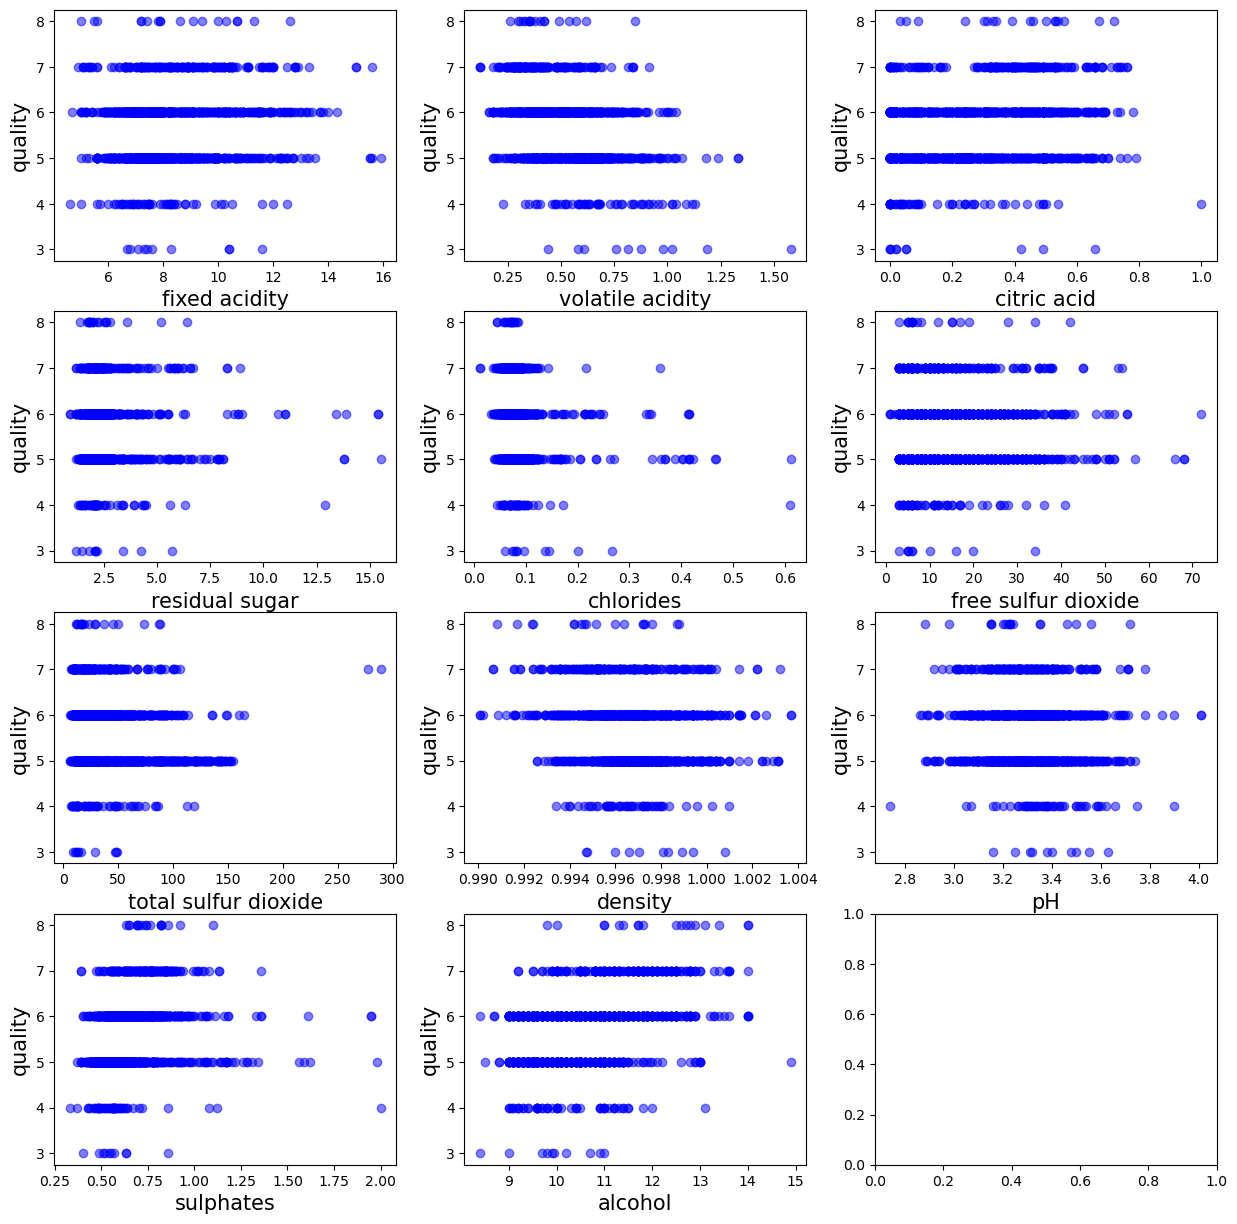

In [4]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
ax = ax.ravel()
for i, feature in enumerate(df_red.columns[:-1]):
    ax[i].scatter(df_red[feature], df_red['quality'], color='b', alpha=0.5)
    ax[i].set_xlabel(feature, fontsize=15)
    ax[i].set_ylabel('quality', fontsize=15)

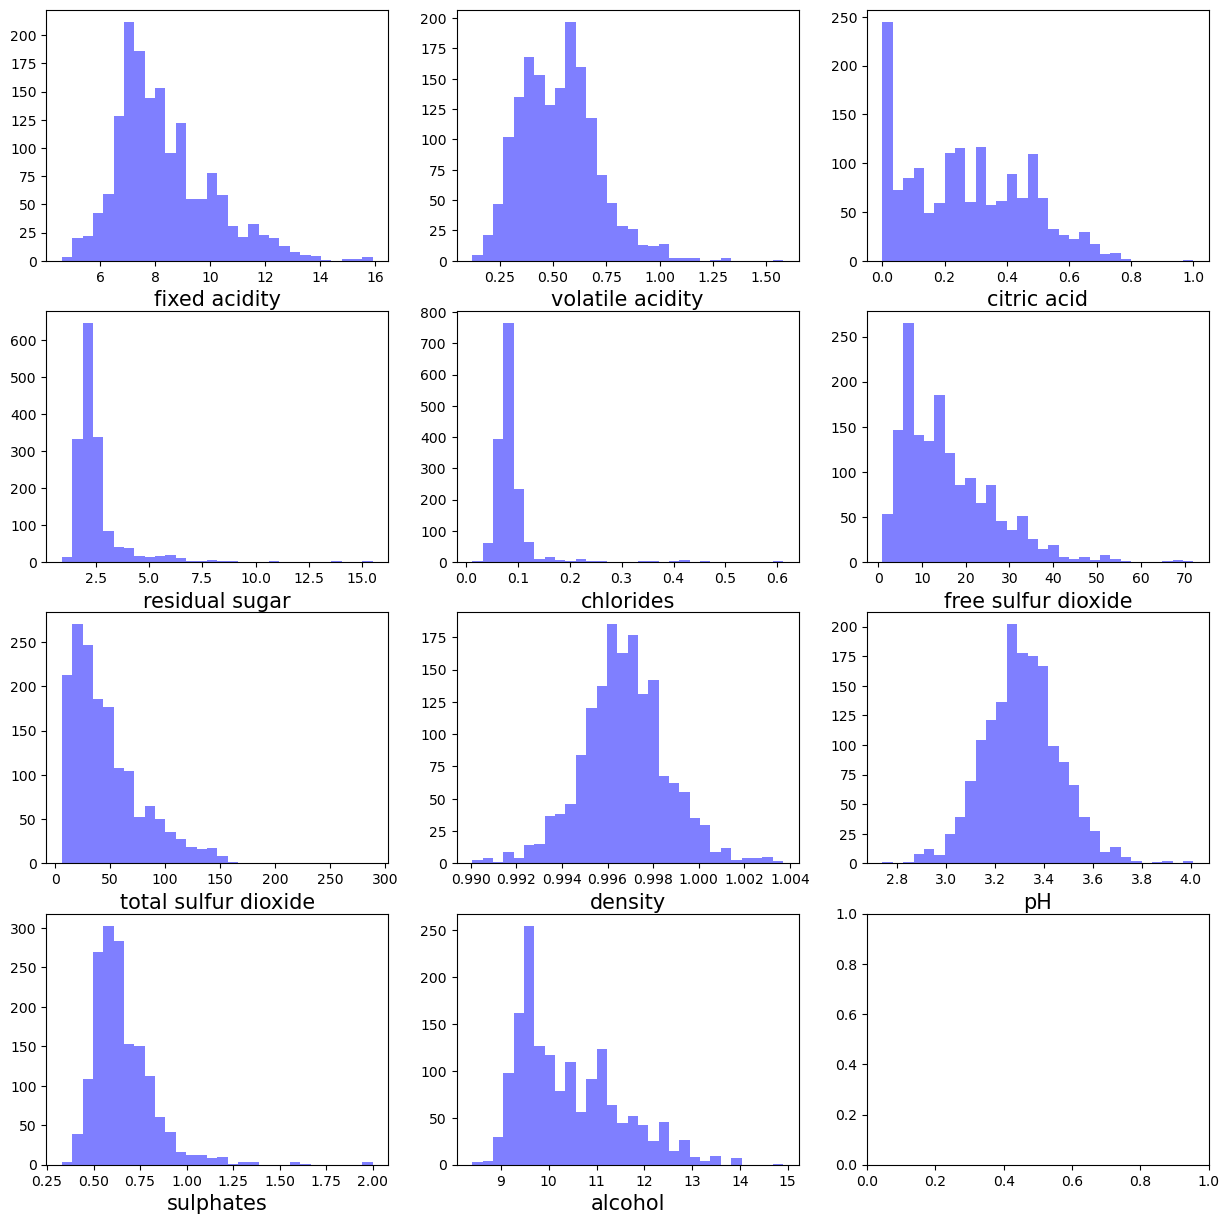

In [5]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
ax = ax.ravel()
for i, feature in enumerate(df_red.columns[:-1]):
    ax[i].hist(df_red[feature], bins=30, color='b', alpha=0.5)
    ax[i].set_xlabel(feature, fontsize=15)

# Picking a scaler based on the data distribution

From the plot above, we can observe that many data are right-skewed. Therefore, the robust scaler or a power transform is preferred over the standard scaler as the tails of the distribution would overestimate the mean of the data through the standard scaler.

In [6]:
from sklearn.preprocessing import RobustScaler, PowerTransformer

rob_scaler = RobustScaler()
power_scaler = PowerTransformer()

In [7]:
X_red_rob = rob_scaler.fit_transform(X_red)
X_red_power = power_scaler.fit_transform(X_red)

## Explanatory variables after the transformation

Robust Scaler


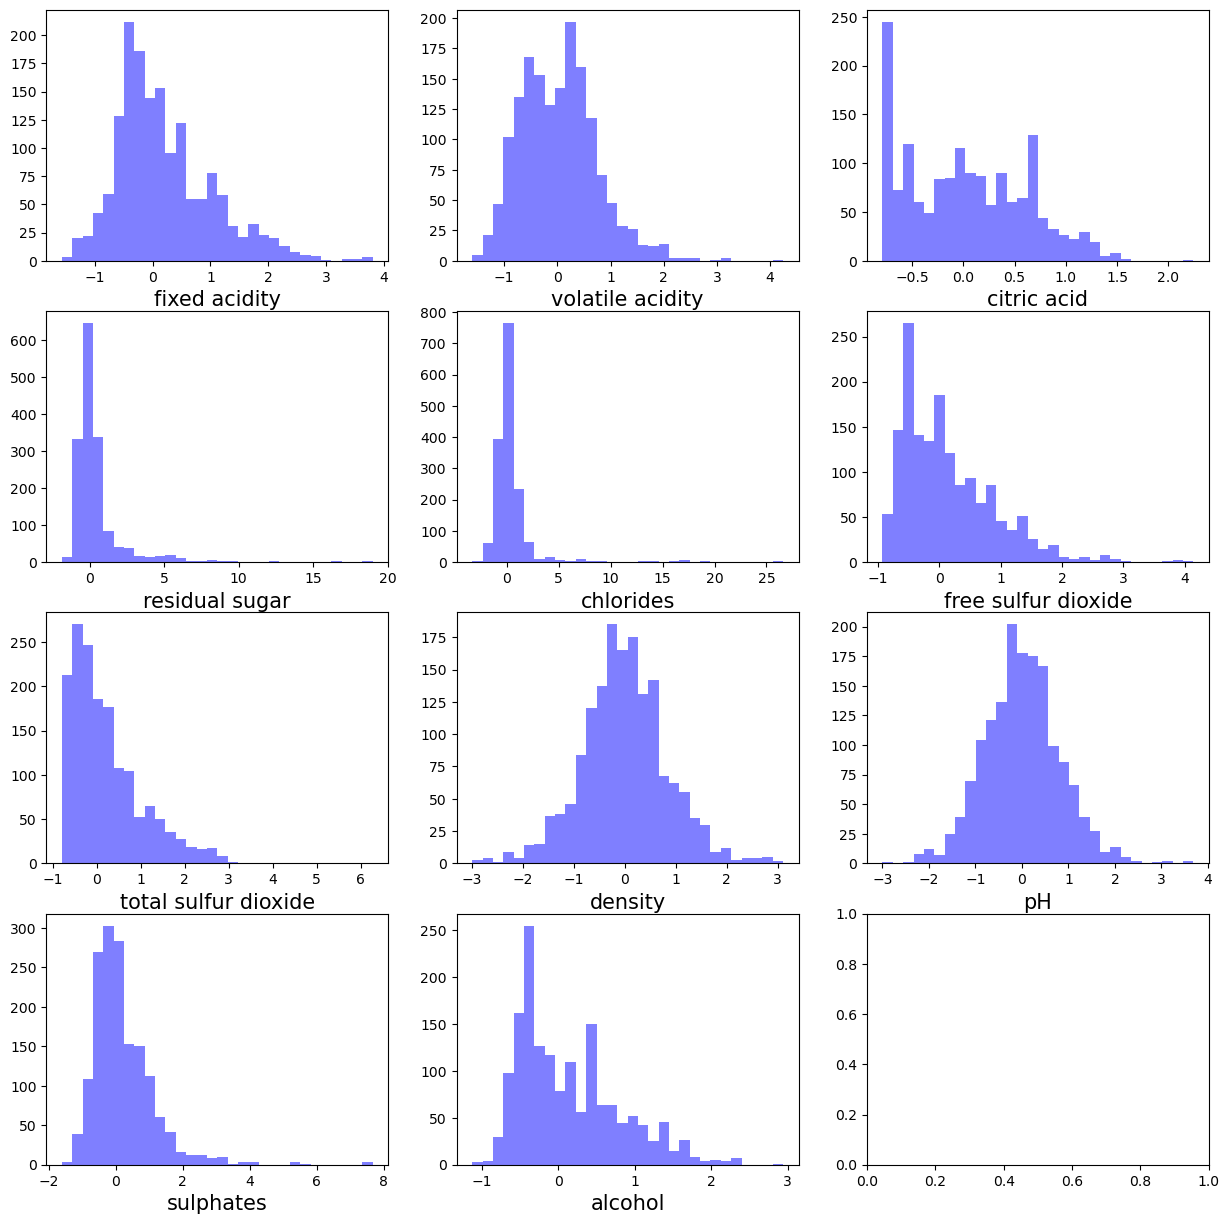

In [8]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
ax = ax.ravel()
for i in range(X_red_rob.shape[1]):
    ax[i].hist(X_red_rob[:, i], bins=30, color='b', alpha=0.5)
    ax[i].set_xlabel(df_red.columns[i], fontsize=15)
print("Robust Scaler")

Power transformation


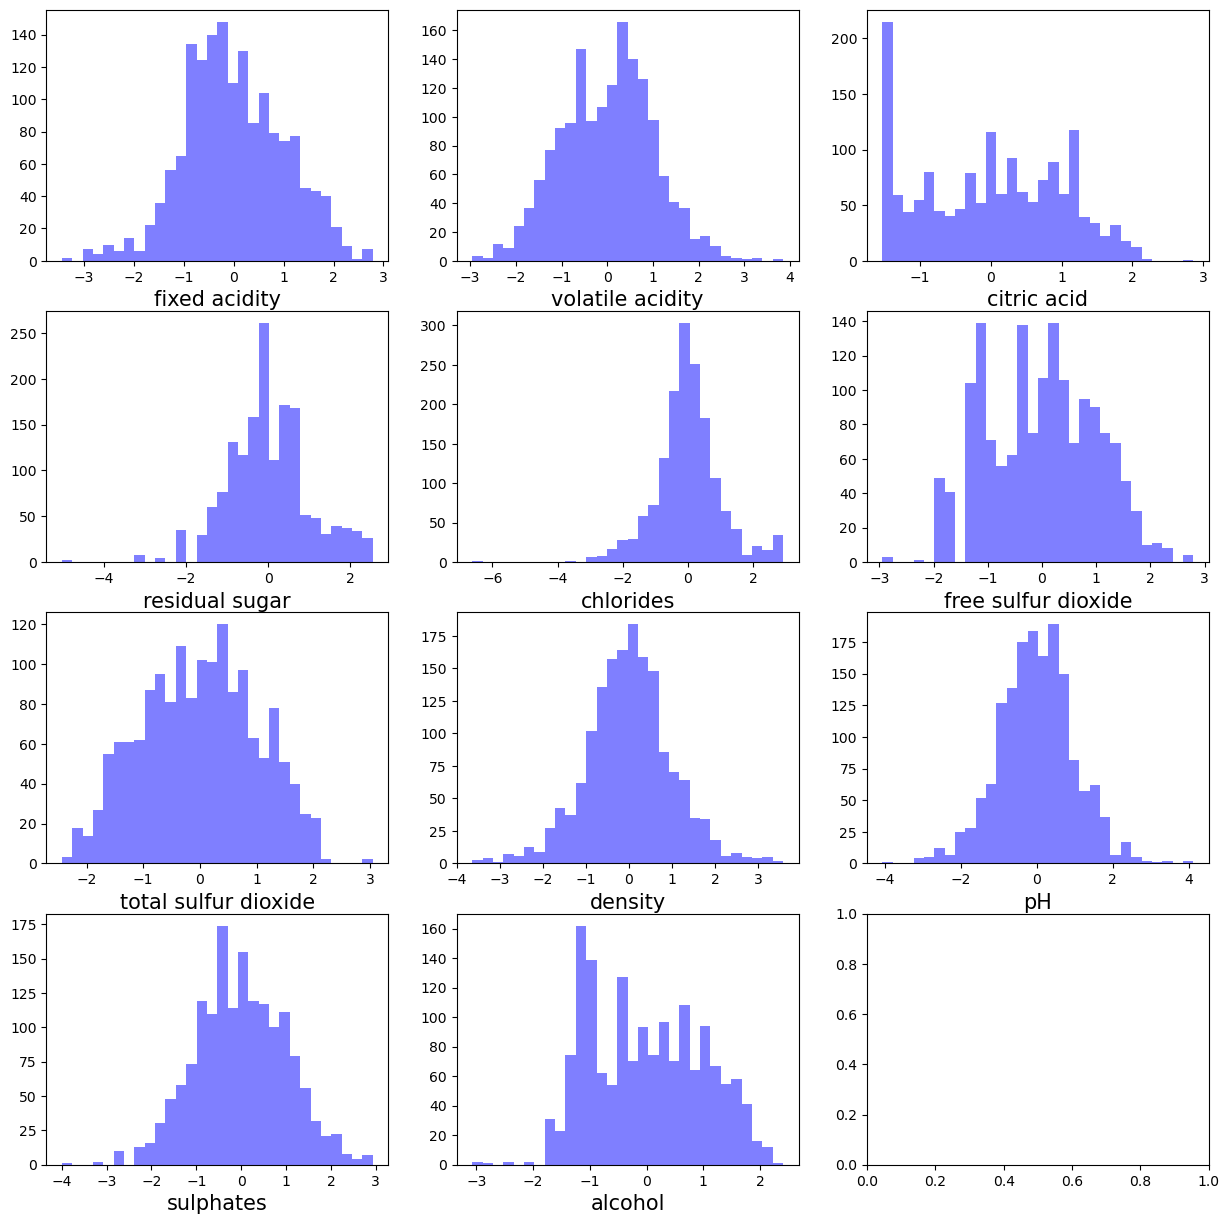

In [9]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
ax = ax.ravel()
for i in range(X_red_power.shape[1]):
    ax[i].hist(X_red_power[:, i], bins=30, color='b', alpha=0.5)
    ax[i].set_xlabel(df_red.columns[i], fontsize=15)
print("Power transformation")

Comparing the pre- and post-transformation distribution plots, we can find that
the power transformation is better in putting the data more Gaussian-like. We
can now build the linear regression model and see which transformation has a better performance.

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf = SVC(gamma='auto', random_state=0)
print("The SVM with robust scaler mean score:", cross_val_score(clf, X_red_rob, y_red, cv=5).mean())
print("The SVM classifier with power transformation mean score:", cross_val_score(clf, X_red_power, y_red, cv=5).mean())


The SVM with robust scaler mean score: 0.5866124608150469
The SVM classifier with power transformation mean score: 0.5691124608150471


In [12]:
clf = RandomForestClassifier(n_estimators=300, random_state=0)
print("The Random Forest classifier with robust scaler mean score:", cross_val_score(clf, X_red_rob, y_red, cv=5).mean())
print("The Random Forest classifier with power transformation mean score:", cross_val_score(clf, X_red_power, y_red, cv=5).mean())

The Random Forest classifier with robust scaler mean score: 0.5778624608150471
The Random Forest classifier with power transformation mean score: 0.5797413793103449


From the result above, the SVM with robust scaler has the best overall performance. The SVM with robust scaler performs better than the SVM with the power transformation, while the random forest with power transformation has a better performance than that with the robust scaler. The classification accuracies from these two classifiers are all near 0.5, which means the classification isn't very accurate. To improve the performance, we can use other models such as the multi-class logistic regression.